#importing the required libraries such as NumPy, Pandas, statsmodels, and Matplotlib for data analysis and visualisation.

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#2.1 Load the provided dataset

In [26]:
#"r" tells the Python interpreter to treat backslashes as a literal (raw) character

In [39]:
#shifting index to the left

In [41]:
data_file_path = r"C:/Users/Dajam/Downloads"
data = pd.read_csv(data_file_path + '/CAPM.csv',index_col=0)

•	In order to estimate a CAPM equation for any stock, I need to first transform the price series into (continuously compounded) returns (ret_google) and then transform the returns into excess returns over the risk-free rate (er_google)

•	Generate continuously compounded returns for the S&P500 index (ret_sandp) and market risk premium (er_sandp).

•	Creating a new data frame with columns: date, ret_google, ret_sandp, er_google, er_sandp


In [44]:
def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

In [46]:
 data2 = pd.DataFrame({'rf' : data['rf'],
                       'ret_sandp' : LogDiff(data['spindx']),
                      'ret_google' : LogDiff(data['GOOG']),
                      'er_sandp' : LogDiff(data['spindx']) - data['rf']*100,# we convert returns to percentage figure in LogDiff
                      'er_google' : LogDiff(data['GOOG']) - data['rf']*100})# here we need to convert 'rf' to percentage for consistency

•	Creating a Time-Series Plot with two lines: one for the excess return of Google (er_google) and another for the market risk premium (er_sandp) over time.

In [49]:
data2.index = pd.to_datetime(data2.index, format='%Y%m%d')

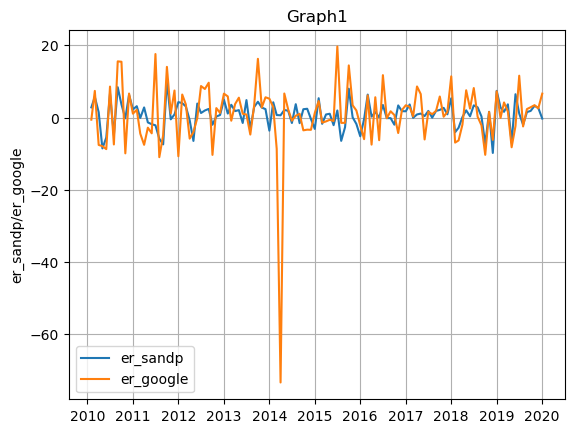

In [51]:
plt.figure(1)
plt.plot(data2['er_sandp'], label='er_sandp')
plt.plot(data2['er_google'], label='er_google')
plt.ylabel('er_sandp/er_google')
plt.title('Graph1')
plt.grid(True)
plt.legend()
plt.show()

•	Creating a Scatter Plot to visualize the relationship between er_google and er_sandp. Place er_google on the x-axis and er_sandp on the y-axis.

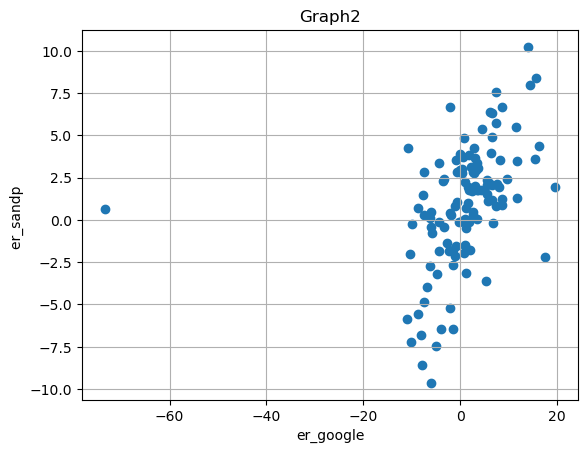

In [9]:
plt.figure(2)
plt.scatter(data2['er_google'],data2['er_sandp'])
plt.xlabel('er_google')
plt.ylabel('er_sandp ')
plt.title('Graph2')
plt.grid(True)
plt.show()

CAPM Regression Estimation

•	Using the formula for CAPM to estimate the beta (β) of Google's stock. For the case of the Ford stock, the CAPM regression equation takes the form:
[(R_google-r_f)]_t= α+ β[(R_M-r_f)_t+u_t

•	Performing a simple linear regression using statsmodels.formula.api to estimate the beta (β) coefficient

In [57]:
formula = 'er_google ~ er_sandp'
# smf add intercept automatically. add '-1' to turn off intercept. e.g. 'er_google ~ er_sandp-1'
results = smf.ols(formula, data2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              er_google   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     21.97
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.51e-06
Time:                        19:38:39   Log-Likelihood:                -428.11
No. Observations:                 120   AIC:                             860.2
Df Residuals:                     118   BIC:                             865.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1230      0.812     -0.151      0.8

(1).	Conduct a t-test to test if the slope coefficient estimate is greater than 1, at 5% significance level

(2). 	Use conditionals to display the test result

•	If null is rejected, print: "Reject the null hypothesis: Coefficient is significantly greater than 1."

•	If null is not rejected, print: "Fail to reject the null hypothesis."


In [60]:
formula = 'er_google ~ er_sandp'
results = smf.ols(formula, data2).fit()

# Define the hypothesized value
hypothesized_value = 1

# Perform the t-test
t_test_result = results.t_test(f"er_sandp = {hypothesized_value}")

In [13]:
print(t_test_result)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0407      0.222      0.183      0.855       0.601       1.480


In [14]:
# Retrieve the p-value from the t-test result
# results.t_test by default is calculating t and p-value for a two-tail test. We here need a one-tail p-value.
# So we need to divide the p-valaue by 2
p_value = t_test_result.pvalue.item()/2

# Compare p-value to significance level
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis: Coefficient is significantly greater than 1.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


Export the processed data as a csv file 

In [63]:
import os
os.getcwd()

'C:\\Users\\dajam\\Desktop'

In [15]:
# save to working directory, i.e. where this python code is stored at
data2.to_csv("CAPM_ret.csv", index=False, header=True)

# alternatively, save to another folder
data2.to_csv(r"C:/Users/Dajam/Downloads/CAPM_ret.csv", index=False, header=True)